In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

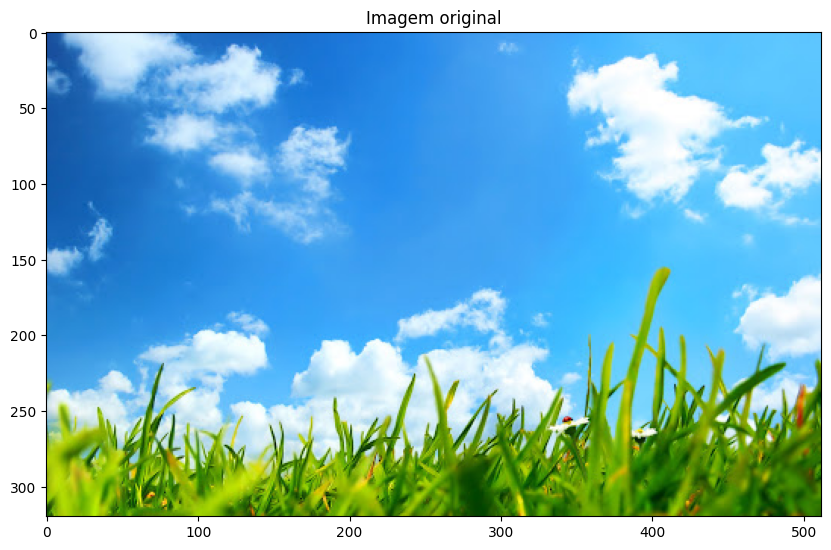

In [14]:
# Define o tamanho da figura para exibição
figsize = (10, 10)

# Carrega a imagem no formato BGR
bgr_img = cv2.imread("grass.jpg")

# Converte a imagem de BGR para RGB para exibição correta em matplotlib
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# Cria uma figura para exibir a imagem
plt.figure(figsize=figsize)
plt.imshow(rgb_img)  # Exibe a imagem em formato RGB
plt.title("Imagem original")  # Define o título da imagem
plt.show()  # Mostra a imagem

In [15]:
# Define uma cor verde no formato RGB
rgb_green = np.uint8([[[0, 255, 0]]])

# Converte a cor de RGB para HSV
hsv_green = cv2.cvtColor(rgb_green, cv2.COLOR_RGB2HSV)[0, 0, :]

# Exibe os valores HSV correspondentes
print(hsv_green)

[ 60 255 255]


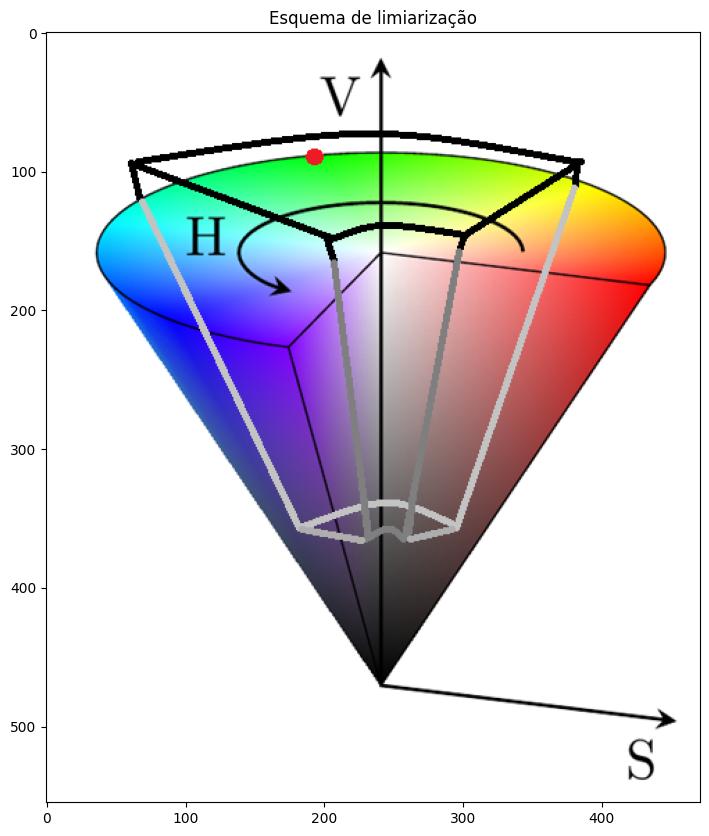

In [16]:
# Carrega uma imagem de esquemas de limiarização (thresholding) no formato BGR
thresholding_schematics = cv2.cvtColor(cv2.imread("hsv_th.png"), cv2.COLOR_BGR2RGB)

# Exibe a imagem convertida para o formato RGB
plt.figure(figsize=figsize)
plt.imshow(thresholding_schematics)
plt.title("Esquema de limiarização")  # Define o título da figura
plt.show()  # Mostra a imagem


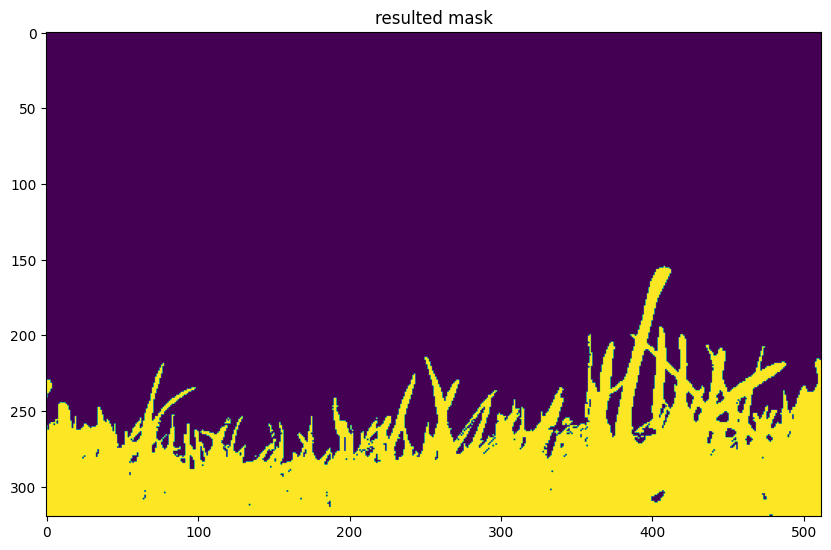

In [17]:
# Converte a imagem RGB para o espaço de cores HSV (Hue, Saturation, Value)
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Define o intervalo de cores para a máscara, utilizando o valor de 'hsv_green' como referência
# 'hsv_green' é a cor média do verde no espaço HSV
lower_th = hsv_green - np.array([70, 200, 200])  # Limite inferior da máscara, ajustando as componentes de cor
upper_th = hsv_green + np.array([30, 0, 0])  # Limite superior da máscara, ajustando as componentes de cor

# Cria a máscara binária, onde os pixels que estão dentro do intervalo especificado se tornam brancos (255) e os outros são pretos (0)
mask = cv2.inRange(hsv_img, lower_th, upper_th)

# Exibe a máscara gerada em um gráfico com título
plt.figure(figsize=figsize)  # Ajusta o tamanho da figura para exibição
plt.imshow(mask)  # Exibe a imagem da máscara
plt.title("resulted mask")  # Define o título da imagem
plt.show()  # Exibe a figura na tela


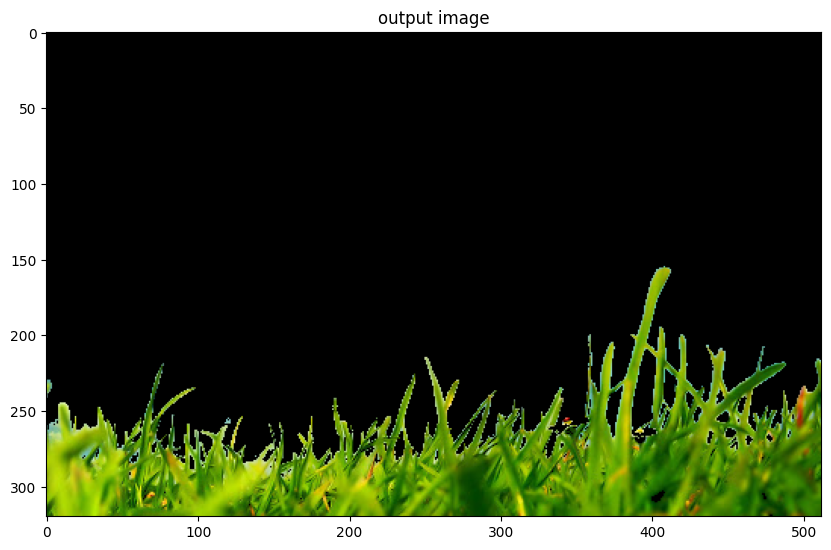

In [18]:
# Aplica a máscara à imagem RGB usando a operação 'bitwise_and'
# Isso mantém apenas os pixels da imagem original onde a máscara é 255 (branca)
rgb_res = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)

# Exibe a imagem resultante com a máscara aplicada
plt.figure(figsize=figsize)  # Ajusta o tamanho da figura para exibição
plt.imshow(rgb_res)  # Exibe a imagem resultante
plt.title("output image")  # Define o título da imagem
plt.show()  # Exibe a figura na tela
